Ниже мы будем использовать всё признаковое пространство, включая признак customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/MLDS_coursework/new-data.csv', index_col=0)
print('data shape:', data.shape)
data.head()

data shape: (594643, 17)


,customer,age,gender,merchant,category,amount,fraud,amount_outlier,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant
0,'C1093826151','4','M','M348934600','es_transportation',4.55,0,0,0,0,1,0,0,0,0,0,0
1,'C352968107','2','M','M348934600','es_transportation',39.68,0,0,0,0,0,0,0,0,0,0,0
2,'C2054744914','4','F','M1823072687','es_transportation',26.89,0,0,0,0,1,1,0,0,0,0,0
3,'C1760612790','3','M','M348934600','es_transportation',17.25,0,0,0,0,1,0,0,0,0,0,0
4,'C757503768','5','M','M348934600','es_transportation',35.72,0,0,0,0,0,0,0,0,0,0,0


# Отбор 2-3 моделей

In [ ]:
# Отберем три лучшие модели. Для этого будем использовать кодировку Weight of Evidence, поскольку она позволяет (как мы выяснили)
# использовать в модели всё признаковое пространтсво, в том числе и customer.

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X.drop('customer', axis=1), y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
# только на базовых признаках

# base_features = ['customer', 'age', 'gender', 'merchant', 'category', 'amount']
# # base_features = ['age', 'gender', 'merchant', 'category', 'amount']
# X_train = X_train[base_features]
# X_test = X_test[base_features]

In [ ]:
X_train.head()

,customer,age,gender,merchant,category,amount,amount_outlier,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant
168395,'C1825950751','4','F','M1823072687','es_transportation',5.54,0,0,0,1,1,0,0,0,0,0
368370,'C759915530','2','M','M1823072687','es_transportation',16.91,0,0,0,0,0,0,0,0,0,0
179485,'C1007572087','2','F','M348934600','es_transportation',13.66,0,0,0,0,1,0,0,0,0,0
118891,'C1940951230','2','F','M1823072687','es_transportation',41.79,0,0,0,0,1,0,0,0,0,0
83228,'C2016997607','2','M','M1823072687','es_transportation',14.72,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install catboost

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from tqdm import tqdm_notebook

In [6]:
!pip install category_encoders

In [7]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model_list = [LogisticRegression(), SGDClassifier(), RandomForestClassifier(), CatBoostClassifier(logging_level='Silent'), LGBMClassifier()]

categorical_features_all = data.select_dtypes('object').columns
for model in tqdm_notebook(model_list):
    pipeline = Pipeline([
        ('categ_enc', TargetEncoder(cols=categorical_features_all)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    crossval_results = cross_validate(
        pipeline, 
        X_train,
        y_train,
        cv=5,
        scoring='average_precision',
        n_jobs=-1,
        return_train_score=True
    )
    print(model, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/5 [00:00<?, ?it/s]

LogisticRegression() 0.8738873304519919
SGDClassifier() 0.8276453445614352
RandomForestClassifier() 0.8945779584703665
<catboost.core.CatBoostClassifier object at 0x7f01c52c66d0> 0.900055806097877
LGBMClassifier() 0.8684119958457959


In [ ]:
new_model_list = [CatBoostClassifier(), RandomForestClassifier(), LogisticRegression()]

In [8]:
categorical_features_all = data.select_dtypes('object').columns
print('categorical features (all):', categorical_features_all)
categorical_features = data.drop('customer', axis=1).select_dtypes('object').columns
print('categorical features      :', categorical_features)

categorical features (all): Index(['customer', 'age', 'gender', 'merchant', 'category'], dtype='object')
categorical features      : Index(['age', 'gender', 'merchant', 'category'], dtype='object')


# Search for optimal encoder

In [9]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders import TargetEncoder, WOEEncoder, MEstimateEncoder

In [ ]:
# мы отобрали три модели. теперь для каждой из моделей подберем свои оптимальные кодировки.
# забегая вперед, мы знаем, что onehotencoder дает лучшее качество. также мы знаем, что
# признак customer является важным. а кроме того, мы знаем что при использовании вместе 
# onehot и customer модель не обучается. поэтому мы будем использовать разные кодировки:
# для customer возмем woeencoder, для остальных - сейчас подберем.

In [ ]:
new_model_list = [CatBoostClassifier(), RandomForestClassifier(), LogisticRegression()]

In [ ]:
# Подбираем оптимальные кодировки для модели LogisticRegression

encoders_list = [OneHotEncoder, LeaveOneOutEncoder, TargetEncoder, WOEEncoder, MEstimateEncoder]

for encoder in tqdm_notebook(encoders_list):
    pipeline = Pipeline([
        ('categ_enc_', encoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('model_', LogisticRegression())                
    ])

    crossval_results = cross_validate(
        pipeline,
        X_train, 
        y_train, 
        cv=5,
        scoring='average_precision',
        n_jobs=-1,
        return_train_score=True
    )
    print(encoder.__name__, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/5 [00:00<?, ?it/s]

OneHotEncoder 0.9096673017334247
LeaveOneOutEncoder 0.878386789392458
TargetEncoder 0.8784926031725451
WOEEncoder 0.8946413236715234
MEstimateEncoder 0.8785450152629896


In [ ]:
# time: 6 минут

In [ ]:
# Подбираем оптимальные кодировки для модели CatBoostClassifier

encoders_list = [OneHotEncoder, LeaveOneOutEncoder, TargetEncoder, WOEEncoder, MEstimateEncoder]

for encoder in tqdm_notebook(encoders_list):
    pipeline = Pipeline([
        ('categ_enc_', encoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('model_', CatBoostClassifier())                
    ])

    crossval_results = cross_validate(
        pipeline,
        X_train, 
        y_train, 
        cv=5,
        scoring='average_precision',
        n_jobs=-1,
        return_train_score=True
    )
    print(encoder.__name__, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/5 [00:00<?, ?it/s]

OneHotEncoder 0.9026424078711962
LeaveOneOutEncoder 0.8469467692604191
TargetEncoder 0.8991404356667747
WOEEncoder 0.9014576108598795
MEstimateEncoder 0.9000142942448083


In [ ]:
# time: 37 минут

In [ ]:
# Подбираем оптимальные кодировки для модели RandomForestClassifier

encoders_list = [OneHotEncoder, LeaveOneOutEncoder, TargetEncoder, WOEEncoder, MEstimateEncoder]

for encoder in tqdm_notebook(encoders_list):
    pipeline = Pipeline([
        ('categ_enc_', encoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('model_', RandomForestClassifier())                
    ])

    crossval_results = cross_validate(
        pipeline,
        X_train, 
        y_train, 
        cv=5,
        scoring='average_precision',
        n_jobs=-1,
        return_train_score=True
    )
    print(encoder.__name__, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


OneHotEncoder 0.9008099856921424
LeaveOneOutEncoder 0.797086580164537
TargetEncoder 0.9010811919058362
WOEEncoder 0.901547491097077
MEstimateEncoder 0.9015292035432341


In [ ]:
# time: 15 минут

Для моделей Logistic Regression и CatBoostClassifier оптимальным кодировщиком оказался OneHotEncoder, а для Random Forest - WOEencoder

# Feature selection

## univariate selection

In [ ]:
# encoder = OneHotEncoder(cols=categorical_features)
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

In [ ]:
# X_test.head()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

In [ ]:
# Подбор параметров для LogisticRegression

In [ ]:
k_list = [10, 20, 30, 40, 50, 60, 70, 80]

for k in tqdm_notebook(k_list):
    pipe = Pipeline([
        ('categ_enc_', OneHotEncoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('selector_', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('model_', LogisticRegression(max_iter=10000))
    ])

    crossval_results = cross_validate(
        pipe, 
        X_train, 
        y_train,
        cv=5, 
        scoring='average_precision',
        return_train_score=True
    )
    print(k, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/8 [00:00<?, ?it/s]

10 0.47952942106955687
20 0.865135334106139
30 0.8828728318074205
40 0.897272859780944
50 0.9042239400161758
60 0.9067277392468673
70 0.9085708806355862
80 0.9089025401945665


In [ ]:
# выполнение ячейки выше заняло 4 часа
# лучший показатель - при 80 фичах 0.9089025401945665

In [ ]:
k_list = [10, 20, 30, 40, 50, 60, 70, 80]

for k in tqdm_notebook(k_list):
    pipe = Pipeline([
        ('categ_enc_', OneHotEncoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('selector_', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('model_', CatBoostClassifier(logging_level='Silent'))
    ])

    crossval_results = cross_validate(
        pipe, 
        X_train, 
        y_train,
        cv=5, 
        scoring='average_precision',
        return_train_score=True
    )
    print(k, crossval_results['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/8 [00:00<?, ?it/s]

10 0.4853731059169621
20 0.8499830131123549
30 0.8786310174237076
40 0.8888587110233033
50 0.9023329683876236
60 0.9049073782431301
70 0.9043681220923034


In [ ]:
# Время работы: 3 часа
# Итог работы: k_best = 70

In [ ]:
k_list = np.arange(1, X_train.shape[1], 2)

for k in tqdm_notebook(k_list):
    pipe = Pipeline([
        ('categ_enc_', WOEEncoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('selector_', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('model_', RandomForestClassifier())
    ])

    crossval_results = cross_validate(
        pipe, 
        X_train, 
        y_train,
        cv=5, 
        scoring='average_precision',
        return_train_score=True
    )
    print(k, crossval_results['test_score'].mean())

In [ ]:
# Время работы: 35 минут
# Итог работы: k_best = 15

## recursive selection (не было запущено повторно)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# k_best = 14
k_best = 88

In [ ]:
pipe_rfe = Pipeline([
    ('cat_encoder_', OneHotEncoder(cols=categorical_features)),
    ('scaler_', StandardScaler()),
    ('selector_', RFE(LogisticRegression(max_iter=10000),
                      n_features_to_select=4000,
                      step=1)), 
    ('model_', LogisticRegression())])

In [ ]:
cv_res3 = cross_validate(pipe_rfe, X_train, y_train, cv=5, scoring='average_precision', return_train_score=True)
cv_res3['test_score'].mean()

In [ ]:
# заняло 2 минуты
# 14 фичей - 0.8910167629233783

## model-based selection (не было запущено повторно)


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
pipe_lasso =  Pipeline([
    ('cat_encoder_', WOEEncoder(cols=categorical_features)),
    ('scaler_', StandardScaler()),
    ('selector_', SelectFromModel(LogisticRegression(max_iter=10000), threshold=1e-5)), 
    ('model_', LogisticRegression())])

In [ ]:
cv_res4 = cross_validate(pipe_lasso, X_train, y_train, cv=5, scoring='average_precision', return_train_score=True)
cv_res4['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8906460614679963

In [ ]:
# 14 фичей, качество 0.8906460614679963

## principal component analysis (appropriate for large data, like after using one hot encoder)

recursive показывает лучший результат

# model selection

In [ ]:
models_with_best_params = [LogisticRegression(max_iter=10000, penalty='l2', C=100, solver='newton-cg'),
                           CatBoostClassifier(logging_level='Silent', depth=3, iterations=500)]

for model in models_with_best_params:
    model_pipeline = Pipeline([
        ('categ_enc_', OneHotEncoder(cols=categorical_features)),
        ('customer_enc_', WOEEncoder(cols=['customer'])),
        ('scaler_', StandardScaler()),
        ('selector_', SelectKBest(score_func=mutual_info_classif, k=80)),
        ('model', model)
    ])

    crossval = cross_validate(
        model_pipeline, 
        X_train, 
        y_train,
        cv=5, 
        scoring='average_precision',
        return_train_score=True
    )

    print(model, crossval['test_score'].mean())

LogisticRegression(C=100, max_iter=10000, solver='newton-cg') 0.9088946325566688
<catboost.core.CatBoostClassifier object at 0x7fdd47517150> 0.9101800794532332


In [ ]:
models_with_best_params = [RandomForestClassifier(criterion='', max_features='', n_estimators='')]

for model in models_with_best_params:
    model_pipeline = Pipeline([
        ('categ_enc_', WOEEncoder(cols=categorical_features_all)),
        ('scaler_', StandardScaler()),
        ('selector_', SelectKBest(score_func=mutual_info_classif, k=80)),
        ('model', model)
    ])

    crossval = cross_validate(
        model_pipeline, 
        X_train, 
        y_train,
        cv=5, 
        scoring='average_precision',
        return_train_score=True
    )

    print(model, crossval['test_score'].mean())

In [ ]:
# Видим, что лучшая модель - это 

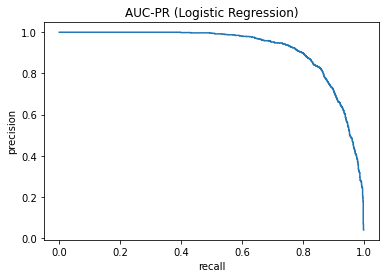

Area Under PR curve: 0.92207


In [ ]:
logreg = CatBoostClassifier(logging_level='Silent', depth=3, iterations=500)

pipeline_logreg = Pipeline([
    ('categ_enc_', OneHotEncoder(cols=categorical_features)),
    ('customer_enc_', WOEEncoder(cols=['customer'])),
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=mutual_info_classif, k=80)),
    ('model', logreg)
])

pipeline_logreg.fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_logreg = pipeline_logreg.predict_proba(X_test)
precision, recall, thershold = precision_recall_curve(y_test, y_pred_logreg[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

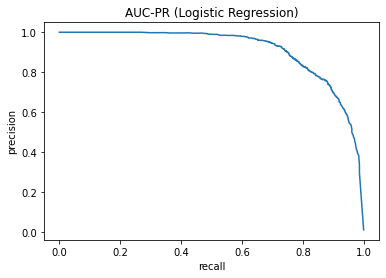

Area Under PR curve: 0.91239


In [ ]:
logreg = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=1000)

pipeline_logreg = Pipeline([
    ('categ_enc_', WOEEncoder(cols=categorical_features_all)),
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=mutual_info_classif, k=15)),
    ('model', logreg)
])

pipeline_logreg.fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_logreg = pipeline_logreg.predict_proba(X_test)
precision, recall, thershold = precision_recall_curve(y_test, y_pred_logreg[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

In [ ]:
from sklearn.feature_selection import RFE

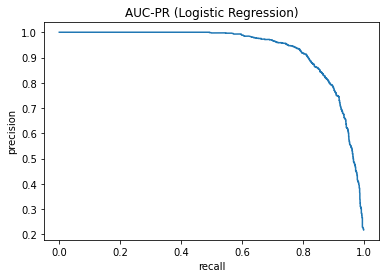

Area Under PR curve: 0.9344


In [ ]:
model = CatBoostClassifier(iterations=100, logging_level='Silent', depth=3, loss_function='Logloss')
# model = LGBMClassifier(n_estimators=200, max_depth=3)

pipe_dif = Pipeline([
        ('categ_enc_', WOEEncoder(cols=categorical_features)),
        ('scaler_', StandardScaler()),
        ('selector', RFE(LogisticRegression(max_iter=1000), n_features_to_select=84, step=1)),
        ('model_', model)                
])

pipe_dif.fit(X_train.drop('customer', axis=1), y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred = pipe_dif.predict_proba(X_test.drop('customer', axis=1))
precision, recall, thershold = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

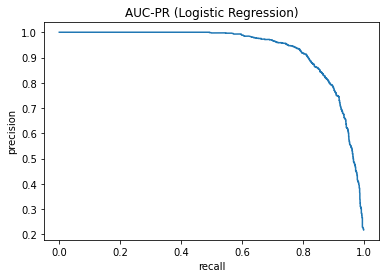

Area Under PR curve: 0.9344


In [ ]:
model = CatBoostClassifier(iterations=100, logging_level='Silent', depth=3, loss_function='Logloss')
# model = LGBMClassifier(n_estimators=200, max_depth=3)

pipe_dif = Pipeline([
        ('categ_enc_', WOEEncoder(cols=categorical_features)),
        ('scaler_', StandardScaler()),
        ('selector', RFE(LogisticRegression(max_iter=1000), n_features_to_select=84, step=1)),
        ('model_', model)                
])

pipe_dif.fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred = pipe_dif.predict_proba(X_test)
precision, recall, thershold = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

In [ ]:
# Area Under PR curve: 0.91504

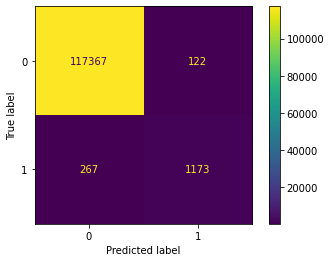

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_rf = pipe_dif.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_dif.classes_)
disp.plot();

# Займемся кластеризацией

In [ ]:
X_train

,customer,age,gender,merchant,category,amount,amount_outlier,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant
168395,'C1825950751','4','F','M1823072687','es_transportation',5.54,0,0,0,1,1,0,0,0,0,0
368370,'C759915530','2','M','M1823072687','es_transportation',16.91,0,0,0,0,0,0,0,0,0,0
179485,'C1007572087','2','F','M348934600','es_transportation',13.66,0,0,0,0,1,0,0,0,0,0
118891,'C1940951230','2','F','M1823072687','es_transportation',41.79,0,0,0,0,1,0,0,0,0,0
83228,'C2016997607','2','M','M1823072687','es_transportation',14.72,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54114,'C1633477199','2','M','M348934600','es_transportation',27.59,0,0,0,0,0,0,0,0,0,0
437159,'C1939349733','2','M','M1823072687','es_transportation',13.55,0,0,0,0,0,0,0,0,0,0
127674,'C785603838','5','M','M1823072687','es_transportation',22.07,0,0,0,0,0,0,0,0,0,0
149824,'C1201696181','4','F','M348934600','es_transportation',24.93,0,0,0,1,1,0,0,0,0,0


In [ ]:
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
woe = WOEEncoder(cols=X_train.select_dtypes('object').columns)
woe.fit(X_train, y_train)
X_train = woe.transform(X_train)

In [ ]:
X_train.head()

,customer,age,gender,merchant,category,amount,amount_outlier,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant
168395,-0.525899,0.081401,0.189606,-7.986064,-8.508736,5.54,0,0,0,1,1,0,0,0,0,0
368370,-0.511300,0.026617,-0.284707,-7.986064,-8.508736,16.91,0,0,0,0,0,0,0,0,0,0
179485,0.991858,0.026617,0.189606,-7.609962,-8.508736,13.66,0,0,0,0,1,0,0,0,0,0
118891,-0.561490,0.026617,0.189606,-7.986064,-8.508736,41.79,0,0,0,0,1,0,0,0,0,0
83228,-0.496485,0.026617,-0.284707,-7.986064,-8.508736,14.72,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
# # Однородность. чем ближе к 1, тем лучше
# homogeneity_score

# # Полнота. чем ближе к 1, тем лучше
# completeness_score

# # V-мера
# v_measure_score

In [18]:
# from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

In [ ]:
n_clusters_list = np.arange(2, 11)

for num in n_clusters_list:
    kmeans = KMeans(n_clusters=num)
    kmeans_result = kmeans.fit_predict(X_train)

    d = {'kmeans':kmeans_result, 'target':y_train}
    df_tmp = pd.DataFrame(d)

    print(f'--{num} clusters--')
    print('    Pearson corr with target y :', df_tmp.corr(method='pearson')['target']['kmeans'])
    print('    Spearman corr with target y:', df_tmp.corr(method='spearman')['target']['kmeans'])

    print('\n    homogeneity score:' ,homogeneity_score(y_train, kmeans_result))
    print('    completness score:', completeness_score(y_train, kmeans_result))
    print('    v-measure score  :', v_measure_score(y_train, kmeans_result))

--2 clusters--
    Pearson corr with target y : 0.22422416381957747
    Spearman corr with target y: 0.22422416381957466

    homogeneity score: 0.04165186895510565
    completness score: 0.5152733311489669
    v-measure score  : 0.07707353612681525
--3 clusters--
    Pearson corr with target y : 0.6562314925536302
    Spearman corr with target y: 0.6653742644578563

    homogeneity score: 0.39490037501550407
    completness score: 0.6438878397793646
    v-measure score  : 0.48955416662482126
--4 clusters--
    Pearson corr with target y : 0.6848935154017725
    Spearman corr with target y: 0.6967303618871179

    homogeneity score: 0.46888222198294255
    completness score: 0.5711516697393134
    v-measure score  : 0.5149887251331124
--5 clusters--
    Pearson corr with target y : 0.45577238917205093
    Spearman corr with target y: 0.5046072971263543

    homogeneity score: 0.542771526992937
    completness score: 0.2327671709967651
    v-measure score  : 0.32581067369875555
--6 clus

In [ ]:
# отдельно еще раз выведем значения метрик для самых лучших значений
n_clusters_list = [2, 3, 4]

for num in n_clusters_list:
    kmeans = KMeans(n_clusters=num)
    kmeans_result = kmeans.fit_predict(X_train)

    d = {'kmeans':kmeans_result, 'target':y_train}
    df_tmp = pd.DataFrame(d)

    print(f'--{num} clusters--')
    print('    Pearson corr with target y :', df_tmp.corr(method='pearson')['target']['kmeans'])
    print('    Spearman corr with target y:', df_tmp.corr(method='spearman')['target']['kmeans'])

    print('\n    homogeneity score:' ,homogeneity_score(y_train, kmeans_result))
    print('    completness score:', completeness_score(y_train, kmeans_result))
    print('    v-measure score  :', v_measure_score(y_train, kmeans_result))

--2 clusters--
    Pearson corr with target y : 0.22422416381957747
    Spearman corr with target y: 0.22422416381957466

    homogeneity score: 0.04165186895510565
    completness score: 0.5152733311489669
    v-measure score  : 0.07707353612681525
--3 clusters--
    Pearson corr with target y : 0.656218331226454
    Spearman corr with target y: 0.665357508568525

    homogeneity score: 0.3948202704470793
    completness score: 0.6441040227499168
    v-measure score  : 0.48955506406654725
--4 clusters--
    Pearson corr with target y : 0.6906512233091227
    Spearman corr with target y: 0.6967834751325773

    homogeneity score: 0.46911319506590965
    completness score: 0.5705760987749995
    v-measure score  : 0.5148937828064998


In [ ]:
# добавим этот признак в признаковое пространство и заново обучим модель

X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)


ohe = OneHotEncoder(cols=categorical_features)
ohe.fit(X_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

woe = WOEEncoder(cols=['customer'])
woe.fit(X_train, y_train)
X_train = woe.transform(X_train)
X_test = woe.transform(X_test)

X_train_cluster = X_train.copy()
X_test_cluster = X_test.copy()



kmeans = KMeans(n_clusters=3)
kmeans_result_train = kmeans.fit_predict(X_train)
kmeans_result_test = kmeans.fit_predict(X_test)

X_train_cluster['cluster'] = kmeans_result_train
X_test_cluster['cluster'] = kmeans_result_test

In [ ]:
X_train_cluster.head()

,customer,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,gender_1,...,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant,cluster
168395,-0.525899,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
368370,-0.511300,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179485,0.991858,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
118891,-0.561490,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
83228,-0.496485,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
X_train_cluster = X_train.copy()
X_test_cluster = X_test.copy()

X_train_cluster['cluster'] = kmeans_result_train
X_test_cluster['cluster'] = kmeans_result_test

In [ ]:
X_train_cluster

,customer,age,gender,merchant,category,amount,amount_outlier,amount_outlier_2,strange_amount,pda,pdg,danger_merch,danger_custm,danger_categ,strange_category,strange_merchant,cluster
168395,'C1825950751','4','F','M1823072687','es_transportation',5.54,0,0,0,1,1,0,0,0,0,0,0
368370,'C759915530','2','M','M1823072687','es_transportation',16.91,0,0,0,0,0,0,0,0,0,0,0
179485,'C1007572087','2','F','M348934600','es_transportation',13.66,0,0,0,0,1,0,0,0,0,0,0
118891,'C1940951230','2','F','M1823072687','es_transportation',41.79,0,0,0,0,1,0,0,0,0,0,0
83228,'C2016997607','2','M','M1823072687','es_transportation',14.72,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54114,'C1633477199','2','M','M348934600','es_transportation',27.59,0,0,0,0,0,0,0,0,0,0,0
437159,'C1939349733','2','M','M1823072687','es_transportation',13.55,0,0,0,0,0,0,0,0,0,0,0
127674,'C785603838','5','M','M1823072687','es_transportation',22.07,0,0,0,0,0,0,0,0,0,0,0
149824,'C1201696181','4','F','M348934600','es_transportation',24.93,0,0,0,1,1,0,0,0,0,0,0


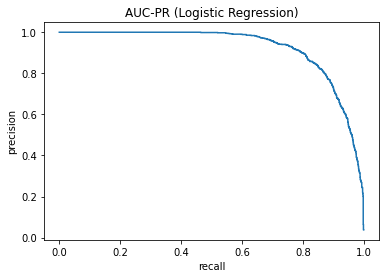

Area Under PR curve: 0.92481


In [ ]:
logreg = CatBoostClassifier(logging_level='Silent', depth=3, iterations=500)

pipeline_logreg = Pipeline([
    ('categ_enc_', OneHotEncoder(cols=categorical_features)),
    ('customer_enc_', WOEEncoder(cols=['customer'])),
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=mutual_info_classif, k=80)),
    ('model', logreg)
])

pipeline_logreg.fit(X_train_cluster, y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_logreg = pipeline_logreg.predict_proba(X_test_cluster)
precision, recall, thershold = precision_recall_curve(y_test, y_pred_logreg[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

In [ ]:
Area Under PR curve: 0.91903 n_cluster=2

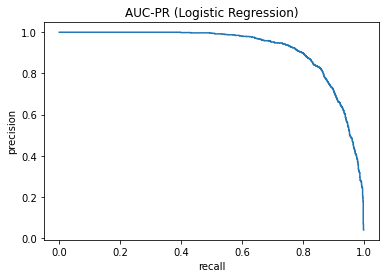

Area Under PR curve: 0.92207


In [ ]:
logreg = CatBoostClassifier(logging_level='Silent', depth=3, iterations=500)

pipeline_logreg = Pipeline([
    ('categ_enc_', OneHotEncoder(cols=categorical_features)),
    ('customer_enc_', WOEEncoder(cols=['customer'])),
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=mutual_info_classif, k=80)),
    ('model', logreg)
])

pipeline_logreg.fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_logreg = pipeline_logreg.predict_proba(X_test)
precision, recall, thershold = precision_recall_curve(y_test, y_pred_logreg[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('AUC-PR (Logistic Regression)')
plt.show()

print('Area Under PR curve:', round(auc(recall, precision), 5))

In [ ]:
Area Under PR curve: 0.92481

In [ ]:
samples_list = [2, 5, 10]
epsilon_list = [0.2, 0.5, 1, 3, 5, 10]

for sample in samples_list:
    for eps in epsilon_list:
        dbscan = DBSCAN(eps=eps, min_samples=sample)
        dbscan_result = dbscan.fit_predict(X_train)

        # d = {'dbscan':kmeans_result, 'target':y_train}
        # df_tmp = pd.DataFrame(d)

        print(f'--{sample} samples, {eps} epsilon--')
        # print('    Pearson corr with target y :', df_tmp.corr(method='pearson')['target']['kmeans'])
        # print('    Spearman corr with target y:', df_tmp.corr(method='spearman')['target']['kmeans'])

        print('\n    homogeneity score:' ,homogeneity_score(y_train, dbscan_result))
        print('    completness score:', completeness_score(y_train, dbscan_result))
        print('    v-measure score  :', v_measure_score(y_train, dbscan_result))

--2 samples, 0.2 epsilon--

    homogeneity score: 0.4320004563079132
    completness score: 0.009848117687148264
    v-measure score  : 0.0192572369133396
--2 samples, 0.5 epsilon--

    homogeneity score: 0.5465745116169225
    completness score: 0.015461281985611254
    v-measure score  : 0.030071901990759244


In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_result = dbscan.fit_predict(X_train)

In [ ]:
print('\n    homogeneity score:' ,homogeneity_score(y_train, dbscan_result))
print('    completness score:', completeness_score(y_train, dbscan_result))
print('    v-measure score  :', v_measure_score(y_train, dbscan_result))


    homogeneity score: 0.5489472630664608
    completness score: 0.016626310847011775
    v-measure score  : 0.03227508587859044


### Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

woe = WOEEncoder(cols=categorical_features_all)
woe.fit(X_train, y_train)
X_train = woe.transform(X_train)
X_test = woe.transform(X_test)

model = AgglomerativeClustering(n_clusters=2)
model.fit(X_train)

In [10]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330740 sha256=90ecb798938217c7ca0ef3dfa81aa6ddab6564f6ddb5412567bb18aac747c189
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [11]:
from hdbscan import HDBSCAN

X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

woe = WOEEncoder(cols=categorical_features_all)
woe.fit(X_train, y_train)
X_train = woe.transform(X_train)
X_test = woe.transform(X_test)

clusterer = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X_train)

HDBSCAN(gen_min_span_tree=True)

In [16]:
y_pred = clusterer.fit_predict(X_train)

In [19]:
print('\n    homogeneity score:' ,homogeneity_score(y_train, y_pred))
print('    completness score:', completeness_score(y_train, y_pred))
print('    v-measure score  :', v_measure_score(y_train, y_pred))


    homogeneity score: 0.3994841930555751
    completness score: 0.0047726816170148905
    v-measure score  : 0.009432670086457014


In [21]:
clusterer = HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
y_pred = clusterer.fit_predict(X_train)
print('\n    homogeneity score:' ,homogeneity_score(y_train, y_pred))
print('    completness score:', completeness_score(y_train, y_pred))
print('    v-measure score  :', v_measure_score(y_train, y_pred))


    homogeneity score: 0.6032547984830308
    completness score: 0.00468898242893425
    v-measure score  : 0.009305633971660987


In [22]:
from sklearn.manifold import TSNE

In [ ]:
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

woe = WOEEncoder(cols=categorical_features_all)
woe.fit(X_train, y_train)
X_train = woe.transform(X_train)
X_test = woe.transform(X_test)

tsne = TSNE(n_components=2)

X_train_2d = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1])
plt.colorbar()
plt.show()